<a href="https://colab.research.google.com/github/Naybellez/analysisCode/blob/apiOlympix/API_2_DF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import requests
import ast
from pprint import pprint as pp
import numpy as np
import seaborn as sns
from urllib.request import urlopen

import time
import datetime

In [ ]:
#Server Link
response = requests.get('http://f71b-35-196-132-135.ngrok.io/<arg>')
print(response)



In [5]:
dataRaw = response.text

In [6]:
print(dataRaw)

[['Gender', 'Event', 'Location', 'Year', 'Medal', 'Name', 'Nationality', 'Result'], ['M', '10000M Men', 'Rio', '2016', 'G', 'Mohamed FARAH', 'USA', '25:05.17'], ['M', '10000M Men', 'Rio', '2016', 'S', 'Paul Kipngetich TANUI', 'KEN', '27:05.64'], ['M', '10000M Men', 'Rio', '2016', 'B', 'Tamirat TOLA', 'ETH', '27:06.26'], ['M', '10000M Men', 'Beijing', '2008', 'G', 'Kenenisa BEKELE', 'ETH', '27:01.17'], ['M', '10000M Men', 'Beijing', '2008', 'S', 'Sileshi SIHINE', 'ETH', '27:02.77'], ['M', '10000M Men', 'Beijing', '2008', 'B', 'Micah KOGO', 'KEN', '27:04.11'], ['M', '10000M Men', 'Sydney', '2000', 'G', 'Haile GEBRSELASSIE', 'ETH', '27:18.20'], ['M', '10000M Men', 'Sydney', '2000', 'S', 'Paul TERGAT', 'KEN', '27:18.29'], ['M', '10000M Men', 'Sydney', '2000', 'B', 'Assefa MEZGEBU', 'ETH', '27:19.75'], ['M', '10000M Men', 'Barcelona', '1992', 'G', 'Khalid SKAH', 'MAR', '27:46.70'], ['M', '10000M Men', 'Barcelona', '1992', 'S', 'Richard CHELIMO', 'KEN', '27:47.72'], ['M', '10000M Men', 'Barc

In [ ]:
#print(dataRaw)

datalist = ast.literal_eval(dataRaw)

dataframe = pd.DataFrame(datalist[1:])

dataframe = dataframe.drop([8], axis=1)

dataframe.columns= datalist[0]
# remove non-usable time values
data_2 = dataframe[dataframe['Result'] != 'None']
data_2 = data_2[data_2['Result'] != '6803.355']
data_2 = data_2[data_2['Result'] != '6771.085']
data_2 = data_2[data_2['Result'] != '6771.085']
data_2 = data_2[data_2['Result'] != '6580.03']
data_2 = data_2[data_2['Result'] != '8462.235']
data_2 = data_2[data_2['Event'] != 'Hammer Throw Women']
data_2 = data_2[data_2['Event'] != 'Discus Throw Women']
data_2 = data_2[data_2['Event'] != 'Javelin Throw Women']
data_2 = data_2[data_2['Gender'] != 'M']

data_2 = data_2[data_2['Result'].apply(lambda x: False == x.__contains__('P'))]
data_2 = data_2[data_2['Result'].apply(lambda x: len(str(x)) != 6)]


data_2.head

In [11]:
# Function to convert column Result to be read as time and then converted into numeric for analysis
# Result column values vary and must be converted seporately 
def convert_time(idx, time_code):
  #print(idx)
  #print(time_code)
  worked = False

  try: # '12.23'
    sec = int(time_code[0])
    cent = int(time_code[2])
    int_time = (sec*100)+cent
    #print(i)
    worked = True
  except:
    pass

  try: # '12.23'
    sec = int(time_code[0:1])
    cent = int(time_code[3:5])
    int_time = (sec*100)+cent
    #print(i)
    worked = True
  except:
    pass
  
  
  try: # '12.23'
    sec = int(time_code[0:2])
    cent = int(time_code[3:5])
    int_time = (sec*100)+cent
    #print(i)
    worked = True
  except:
    pass

  try:#'29:17.45
    #'%H:%M.%S
    mins = int(time_code[0:2])
    sec = int(time_code[3:5])
    cent = int(time_code[6:8])
    int_time = (60*(100*mins)+(sec*100)+cent)
    worked = True
  except:
    pass

  try:
    #''4:08.92'
    #'%H:%M.%S
    
    mins = int(time_code[0:1])
    sec = int(time_code[2:4])
    cent = int(time_code[5:7])
    print(mins, sec, cent)    
    int_time = (60*(100*mins)+(sec*100)+cent)
    worked = True
  except:
    pass

  try:
    #'%d:%H:%M.%S')

    hours = int(time_code[0:2])
    minutes = int(time_code[4:5])
    seconds = int(time_code[7:9])
    cent= int(time_code[9:11])
    
    int_time = (60*(60*(100*hours)),60*(100*mins)+(sec*100)+cent)
    
    worked = True
  except:
    pass

  
  if worked == False:
    #print(time_code)
    i = float(time.strptime(time_code.split(',')[0],'%d:%H:%M.%S'))
    #print(i)

  #print(idx, int_time*100, time_code)
  return int_time /100


In [ ]:
data_2['Time'] = [convert_time(idx, i) for idx, i in enumerate(data_2['Result'])]

In [ ]:
data_2.head()

In [14]:
# Filter for 100M
df_w100 = data_2[data_2['Event']== '100M Women']
df_w100.head()

,Gender,Event,Location,Year,Medal,Name,Nationality,Result,Time
1687,W,100M Women,Rio,2016,G,Elaine THOMPSON,JAM,10.71,10.71
1688,W,100M Women,Rio,2016,S,Tori BOWIE,USA,10.83,10.83
1689,W,100M Women,Rio,2016,B,Shelly-Ann FRASER-PRYCE,JAM,10.86,10.86
1690,W,100M Women,Beijing,2008,G,Shelly-Ann FRASER-PRYCE,JAM,10.78,10.78
1691,W,100M Women,Beijing,2008,S,Sherone SIMPSON,JAM,10.98,10.98


In [73]:
# Filter for 200M
df_w200 = data_2[data_2['Event']== '200M Women']

In [74]:
# Filter for 400M
df_w400 = data_2[data_2['Event']== '400M Women']

In [15]:
df_w100['Result'] = [float(i) for i in df_w100['Result']]
gmin = min(df_w100['Result']) 
gmax = max(df_w100['Result'])

gsum = sum(df_w100['Result'])
glen = len(df_w100['Result'])
gmean = gsum/ glen


10.71
12.2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [76]:
df_w200['Result'] = [float(i) for i in df_w200['Result']]
gmin2 = min(df_w200['Result']) 
gmax2 = max(df_w200['Result'])

gsum2 = sum(df_w200['Result'])
glen2 = len(df_w200['Result'])
gmean2 = gsum2/ glen2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [77]:
df_w400['Result'] = [float(i) for i in df_w400['Result']]
gmin4 = min(df_w400['Result']) 
gmax4 = max(df_w400['Result'])

gsum4 = sum(df_w400['Result'])
glen4 = len(df_w400['Result'])
gmean4 = gsum4/ glen4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
df_w100_m = df_w100['Medal']
df_w100_r = df_w100['Result']

In [79]:
df_2100_m = df_w200['Medal']
df_w200_r = df_w200['Result']

In [80]:
df_w400_m = df_w400['Medal']
df_w400_r = df_w400['Result']

In [ ]:
print(df_w100[df_w100['Medal'] == 'G']['Time'])

In [ ]:
data = df_w100[df_w100['Medal'] == 'G']
#print(data)
data['Year'] = [int(i) for i in data['Year']]
data.groupby('Year')

data_gold = data.sort_values('Year')

data = df_w100[df_w100['Medal'] == 'S']
#print(data)
data['Year'] = [int(i) for i in data['Year']]
data.groupby('Year')

data_silver = data.sort_values('Year')

data = df_w100[df_w100['Medal'] == 'B']
#print(data)
data['Year'] = [int(i) for i in data['Year']]
data.groupby('Year')

data_bronze = data.sort_values('Year')

gsdiff = []
print(list(data_silver['Time']))
for i in range(len(list(data_gold['Time']))):
  data_ds = list(data_gold['Time'])[i] - list(data_silver['Time'])[i]
  gsdiff.append(data_ds)


print(data_ds)

In [83]:
data2 = df_w200[df_w200['Medal'] == 'G']

data2['Year'] = [int(i) for i in data2['Year']]
data2.groupby('Year')

data2_gold = data2.sort_values('Year')

data2 = df_w200[df_w200['Medal'] == 'S']

data2['Year'] = [int(i) for i in data2['Year']]
data2.groupby('Year')

data2_silver = data2.sort_values('Year')

data2 = df_w200[df_w200['Medal'] == 'B']

data2['Year'] = [int(i) for i in data2['Year']]
data2.groupby('Year')

data2_bronze = data2.sort_values('Year')

gsdiff2 = []
print(list(data2_silver['Time']))
for i in range(len(list(data2_gold['Time']))):
  data2_ds = list(data2_gold['Time'])[i] - list(data2_silver['Time'])[i]
  gsdiff2.append(data2_ds)


print(data2_ds)

[25.01, 24.02, 23.07, 24.04, 23.01, 22.07, 22.45, 22.39, 22.19, 22.04, 22.02, 22.24, 22.28, 22.18, 21.93, 22.09, 21.88]
-0.09999999999999787


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [85]:
# creating small df of just medal values

data4 = df_w400[df_w400['Medal'] == 'G']
#print(data)
data4['Year'] = [int(i) for i in data4['Year']]
data4.groupby('Year')

data4_gold = data4.sort_values('Year')

data4 = df_w400[df_w400['Medal'] == 'S']
#print(data)
data4['Year'] = [int(i) for i in data4['Year']]
data4.groupby('Year')

data4_silver = data4.sort_values('Year')

data4 = df_w400[df_w400['Medal'] == 'B']
#print(data)
data4['Year'] = [int(i) for i in data4['Year']]
data4.groupby('Year')

data4_bronze = data4.sort_values('Year')

# gsdiff4 = []
# print(list(data4_silver['Time']))
# for i in range(len(list(data4_gold['Time']))):
#   data4_ds = list(data4_gold['Time'])[i] - list(data4_silver['Time'])[i]
#   gsdiff4.append(data4_ds)


print(data4_ds)

-0.07000000000000028


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

In [89]:
 # Gold Silver mean difference 100m
gsdiff = []
for idx, i in enumerate(data_gold['Time']):
  #print(i)
  if idx == 0:
    pass
  else:
    #print(list(df_w100[df_w100['Medal'] == 'S']['Time'])[idx])
    x = i - list(data_silver['Time'])[idx]
    gsdiff.append(x)


In [97]:
 # Gold Silver mean difference 200m
gsdiff2 = []
for idx, i in enumerate(data2_gold['Time']):
  #print(i)
  if idx == 0:
    pass
  else:
    x = i - list(data2_silver['Time'])[idx]
    gsdiff2.append(x)


In [98]:
 # Gold Silver mean difference 400m
gsdiff4 = []
for idx, i in enumerate(data4_gold['Time']):
  #print(i)
  if idx == 0:
    pass
  else:
    x = i - list(data4_silver['Time'])[idx]
    gsdiff4.append(x)


In [91]:
# silver bronze mean difference 100m
sbdiff = []
for idx, i in enumerate(data_bronze['Time']):
  #print(i)
  if idx == 0:
    pass
  else:
    x =  list(data_silver['Time'])[idx] - i
    sbdiff.append(x)


In [99]:
# silver bronze mean difference 200m
sbdiff2 = []
for idx, i in enumerate(data2_bronze['Time']):
  if idx == 0:
    pass
  else:
    x =  list(data2_silver['Time'])[idx] - i
    sbdiff2.append(x)

In [100]:
# silver bronze mean difference 400m
sbdiff4 = []
for idx, i in enumerate(data4_bronze['Time']):
  if idx == 0:
    pass
  else:
    x =  list(data4_silver['Time'])[idx] - i
    sbdiff4.append(x)

In [92]:
# Getting the difference in time between Medal Result means 100m

goldmean = sum(data_gold['Time'])/ len(data_gold['Time'])
silvermean = sum(data_silver['Time'])/ len(data_silver['Time'])
bronzemean = sum(data_bronze['Time'])/ len(data_bronze['Time'])

gsdiff =  goldmean - silvermean 
sbdiff =  silvermean - bronzemean
gbdiff = goldmean - bronzemean
diffList = [gsdiff, sbdiff, gbdiff] 

labelList = ['GSdiff', 'SBdiff', 'GBdiff']

In [101]:
# Getting the difference in time between Medal Result means 200m

goldmean2 = sum(data2_gold['Time'])/ len(data2_gold['Time'])
silvermean2 = sum(data2_silver['Time'])/ len(data2_silver['Time'])
bronzemean2 = sum(data2_bronze['Time'])/ len(data2_bronze['Time'])

gsdiff2 =  goldmean2 - silvermean2 
sbdiff2 =  silvermean2 - bronzemean2
gbdiff2 = goldmean2 - bronzemean2
diffList2 = [gsdiff2, sbdiff2, gbdiff2] 

labelList2 = ['GSdiff', 'SBdiff', 'GBdiff']

In [111]:
print(gsdiff, 'gs')
print(sbdiff, 'sb')
print(gbdiff, 'gb')

print(gsdiff2, 'gs2')
print(sbdiff2, 'sb2')
print(gbdiff2, 'gb2')

print(gsdiff4, 'gs4')
print(sbdiff4, 'sb4')
print(gbdiff4, 'gb4')

-0.04939849624060422 gs
-0.07484126984127037 sb
-0.12423976608187459 gb
-0.22411764705882575 gs2
-0.048823529411762934 sb2
-0.2729411764705887 gb2
-0.23538461538461775 gs4
-0.36461538461537657 sb4
-0.5999999999999943 gb4


In [102]:
# Getting the difference in time between Medal Result means 400m

goldmean4 = sum(data4_gold['Time'])/ len(data4_gold['Time'])
silvermean4 = sum(data4_silver['Time'])/ len(data4_silver['Time'])
bronzemean4 = sum(data4_bronze['Time'])/ len(data4_bronze['Time'])

gsdiff4 =  goldmean4 - silvermean4 
sbdiff4 =  silvermean4 - bronzemean4
gbdiff4 = goldmean4 - bronzemean4
diffList4 = [gsdiff4, sbdiff4, gbdiff4] 

labelList4 = ['GSdiff', 'SBdiff', 'GBdiff']

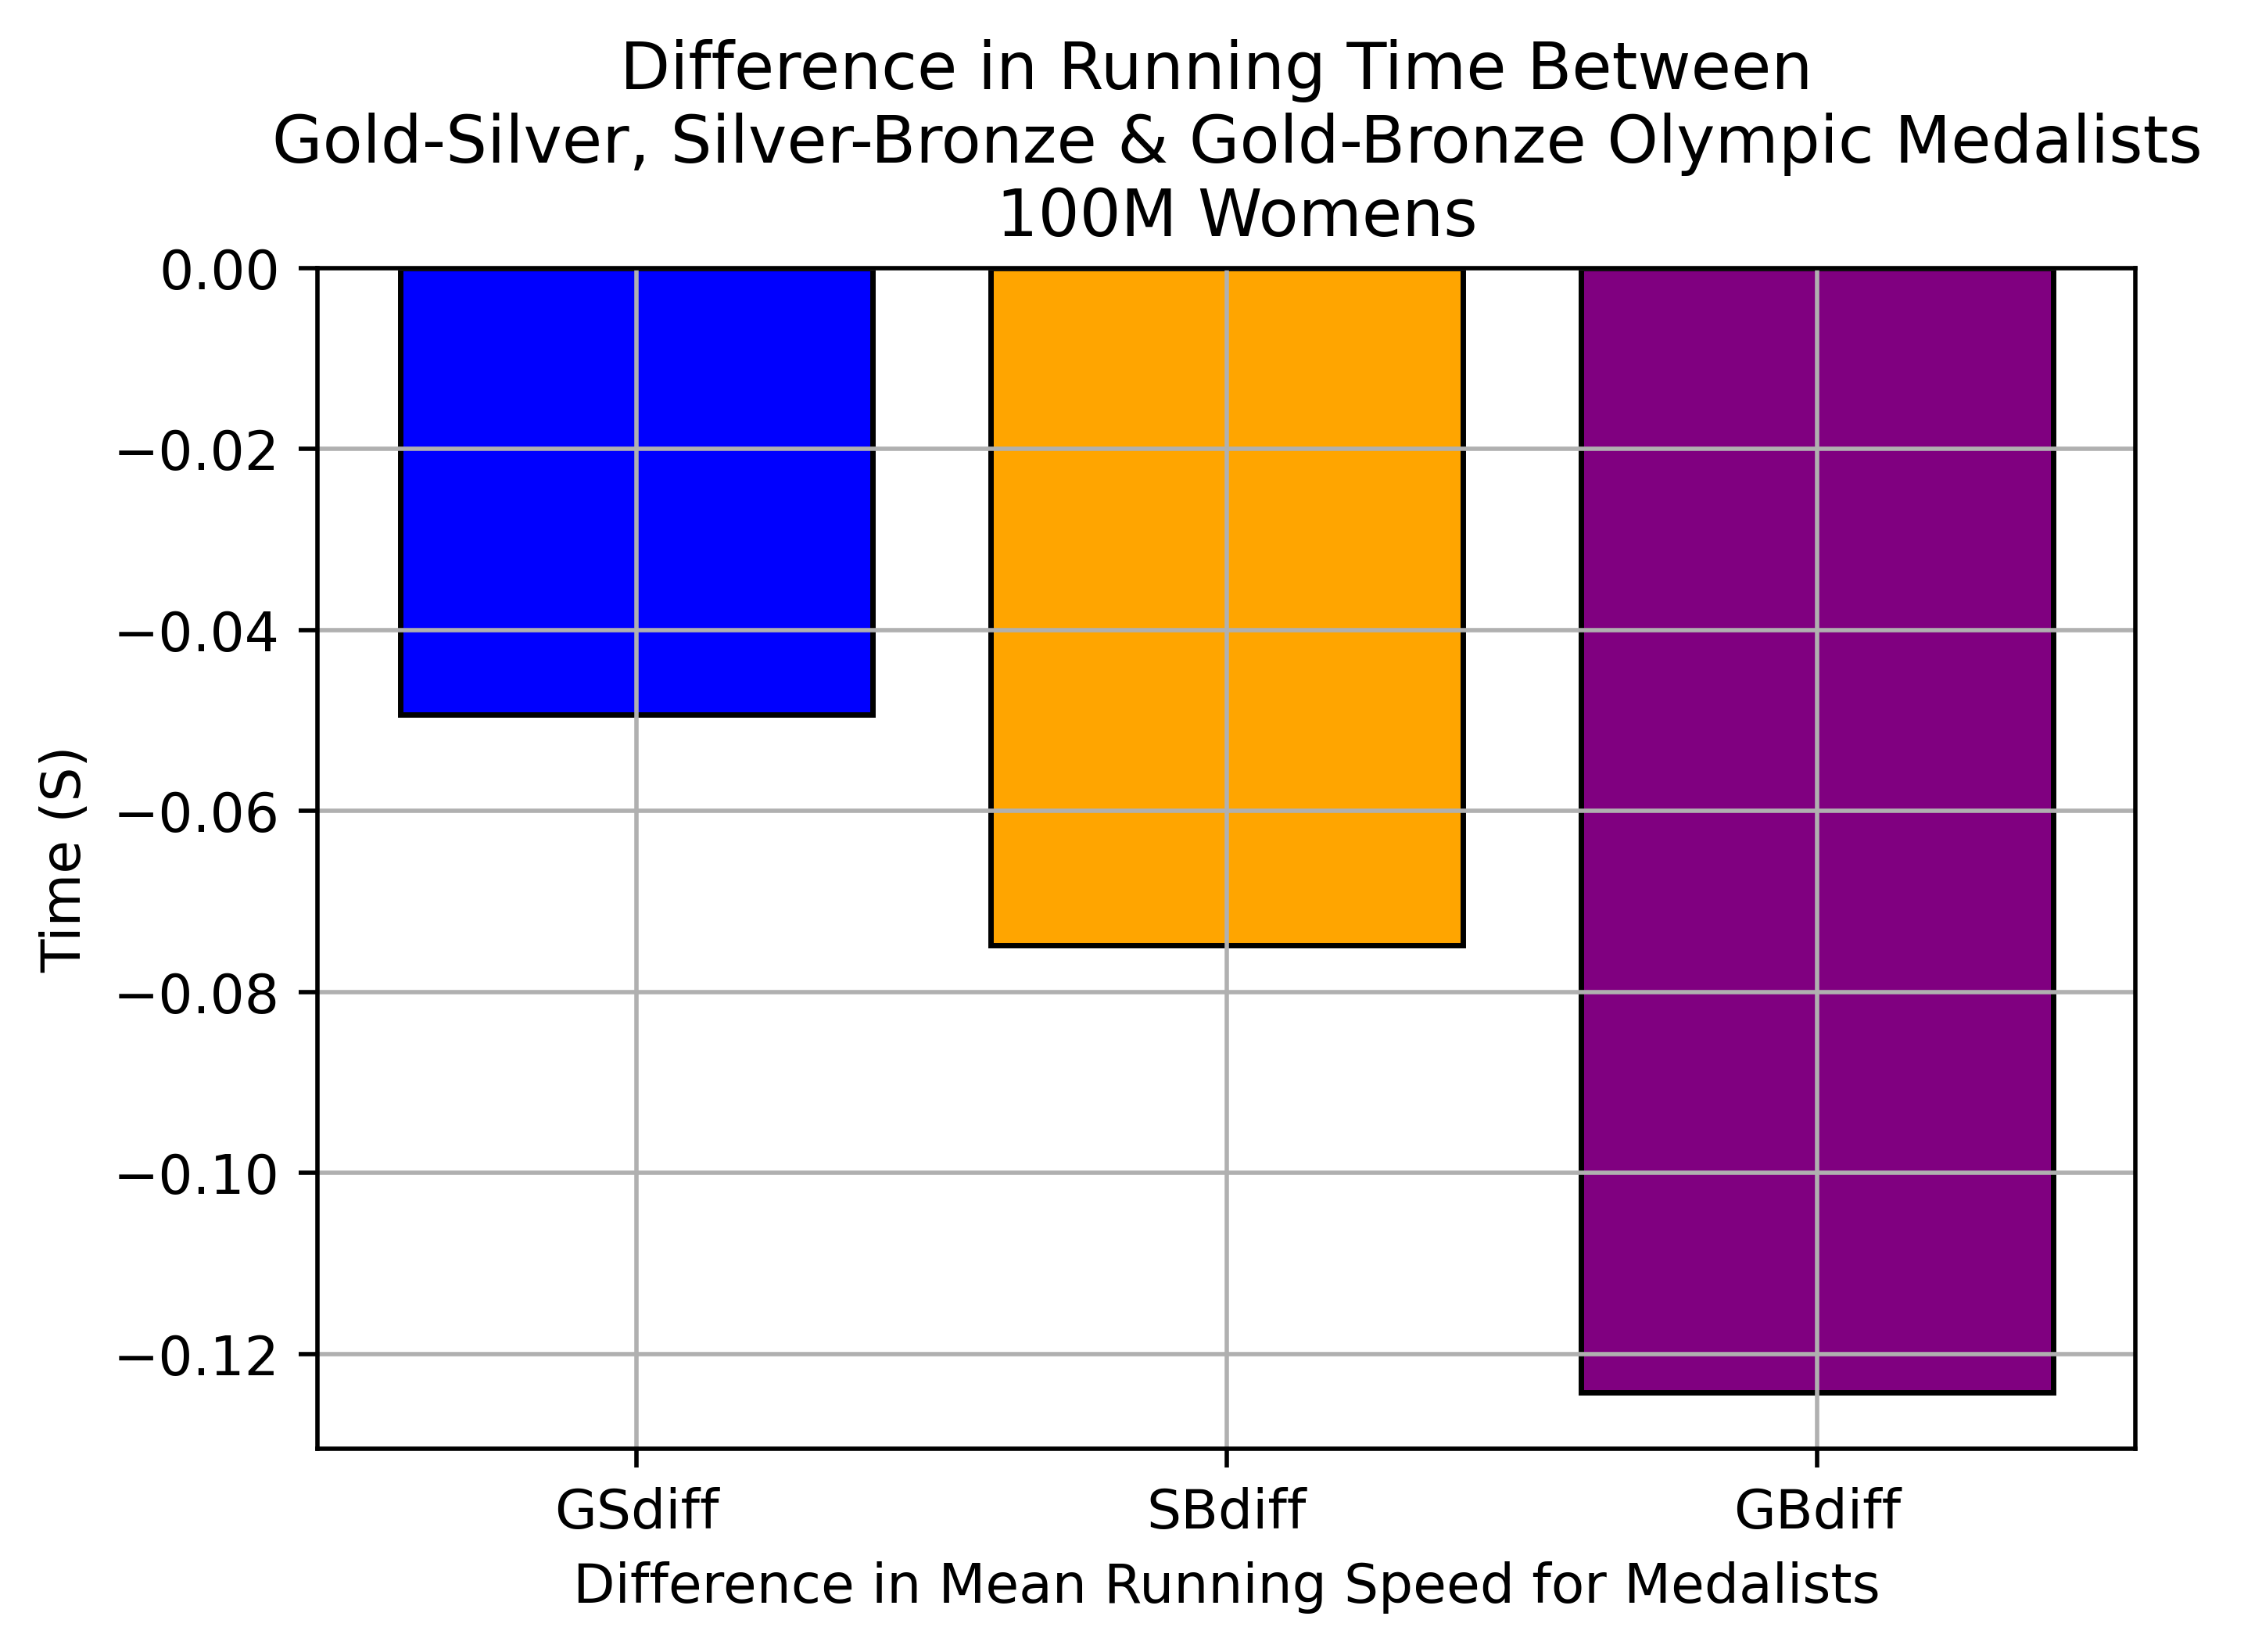

In [107]:
plt.figure(dpi = 500)
dave = plt.bar(labelList, diffList, color = ['blue', 'orange', 'purple'], edgecolor= 'black')
plt.title('Difference in Running Time Between \n  Gold-Silver, Silver-Bronze & Gold-Bronze Olympic Medalists \n 100M Womens')
plt.xlabel('Difference in Mean Running Speed for Medalists')
plt.ylabel('Time (S)')
plt.legend
plt.grid()

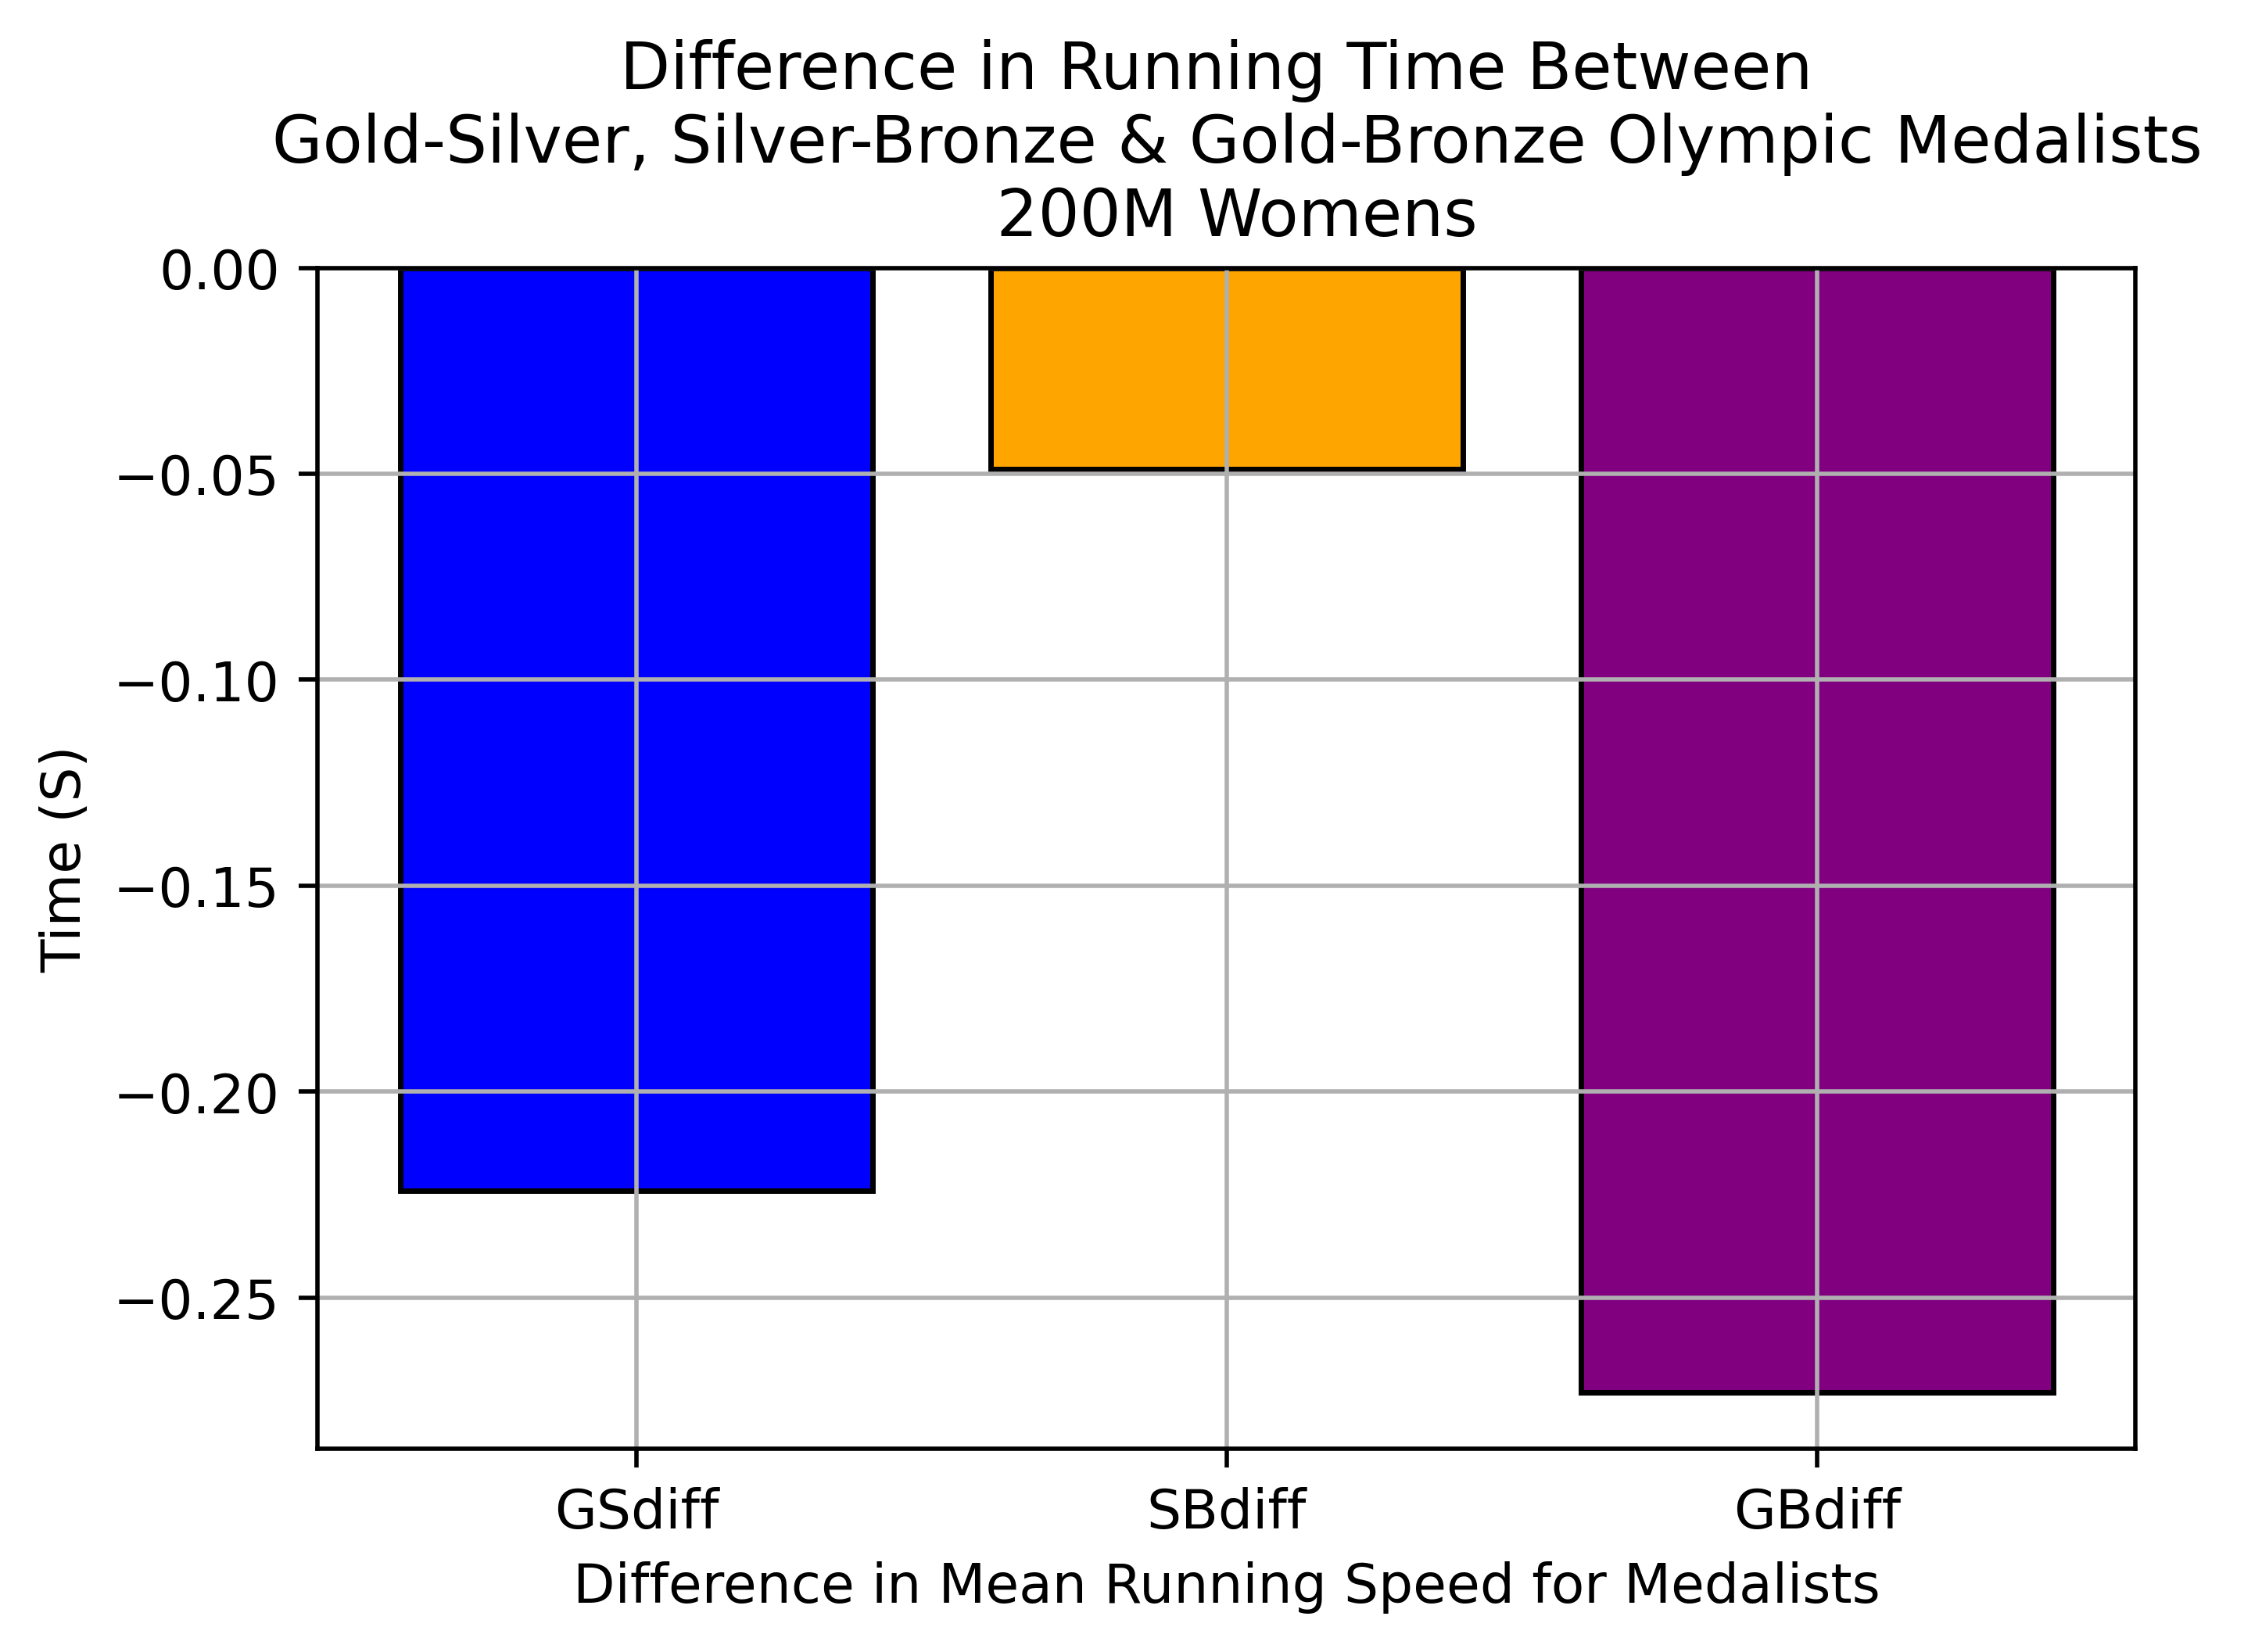

In [109]:
plt.figure(dpi = 500)
dave = plt.bar(labelList2, diffList2, color = ['blue', 'orange', 'purple'], edgecolor= 'black')
plt.title('Difference in Running Time Between \n  Gold-Silver, Silver-Bronze & Gold-Bronze Olympic Medalists \n 200M Womens')
plt.xlabel('Difference in Mean Running Speed for Medalists')
plt.ylabel('Time (S)')
plt.legend
plt.grid()

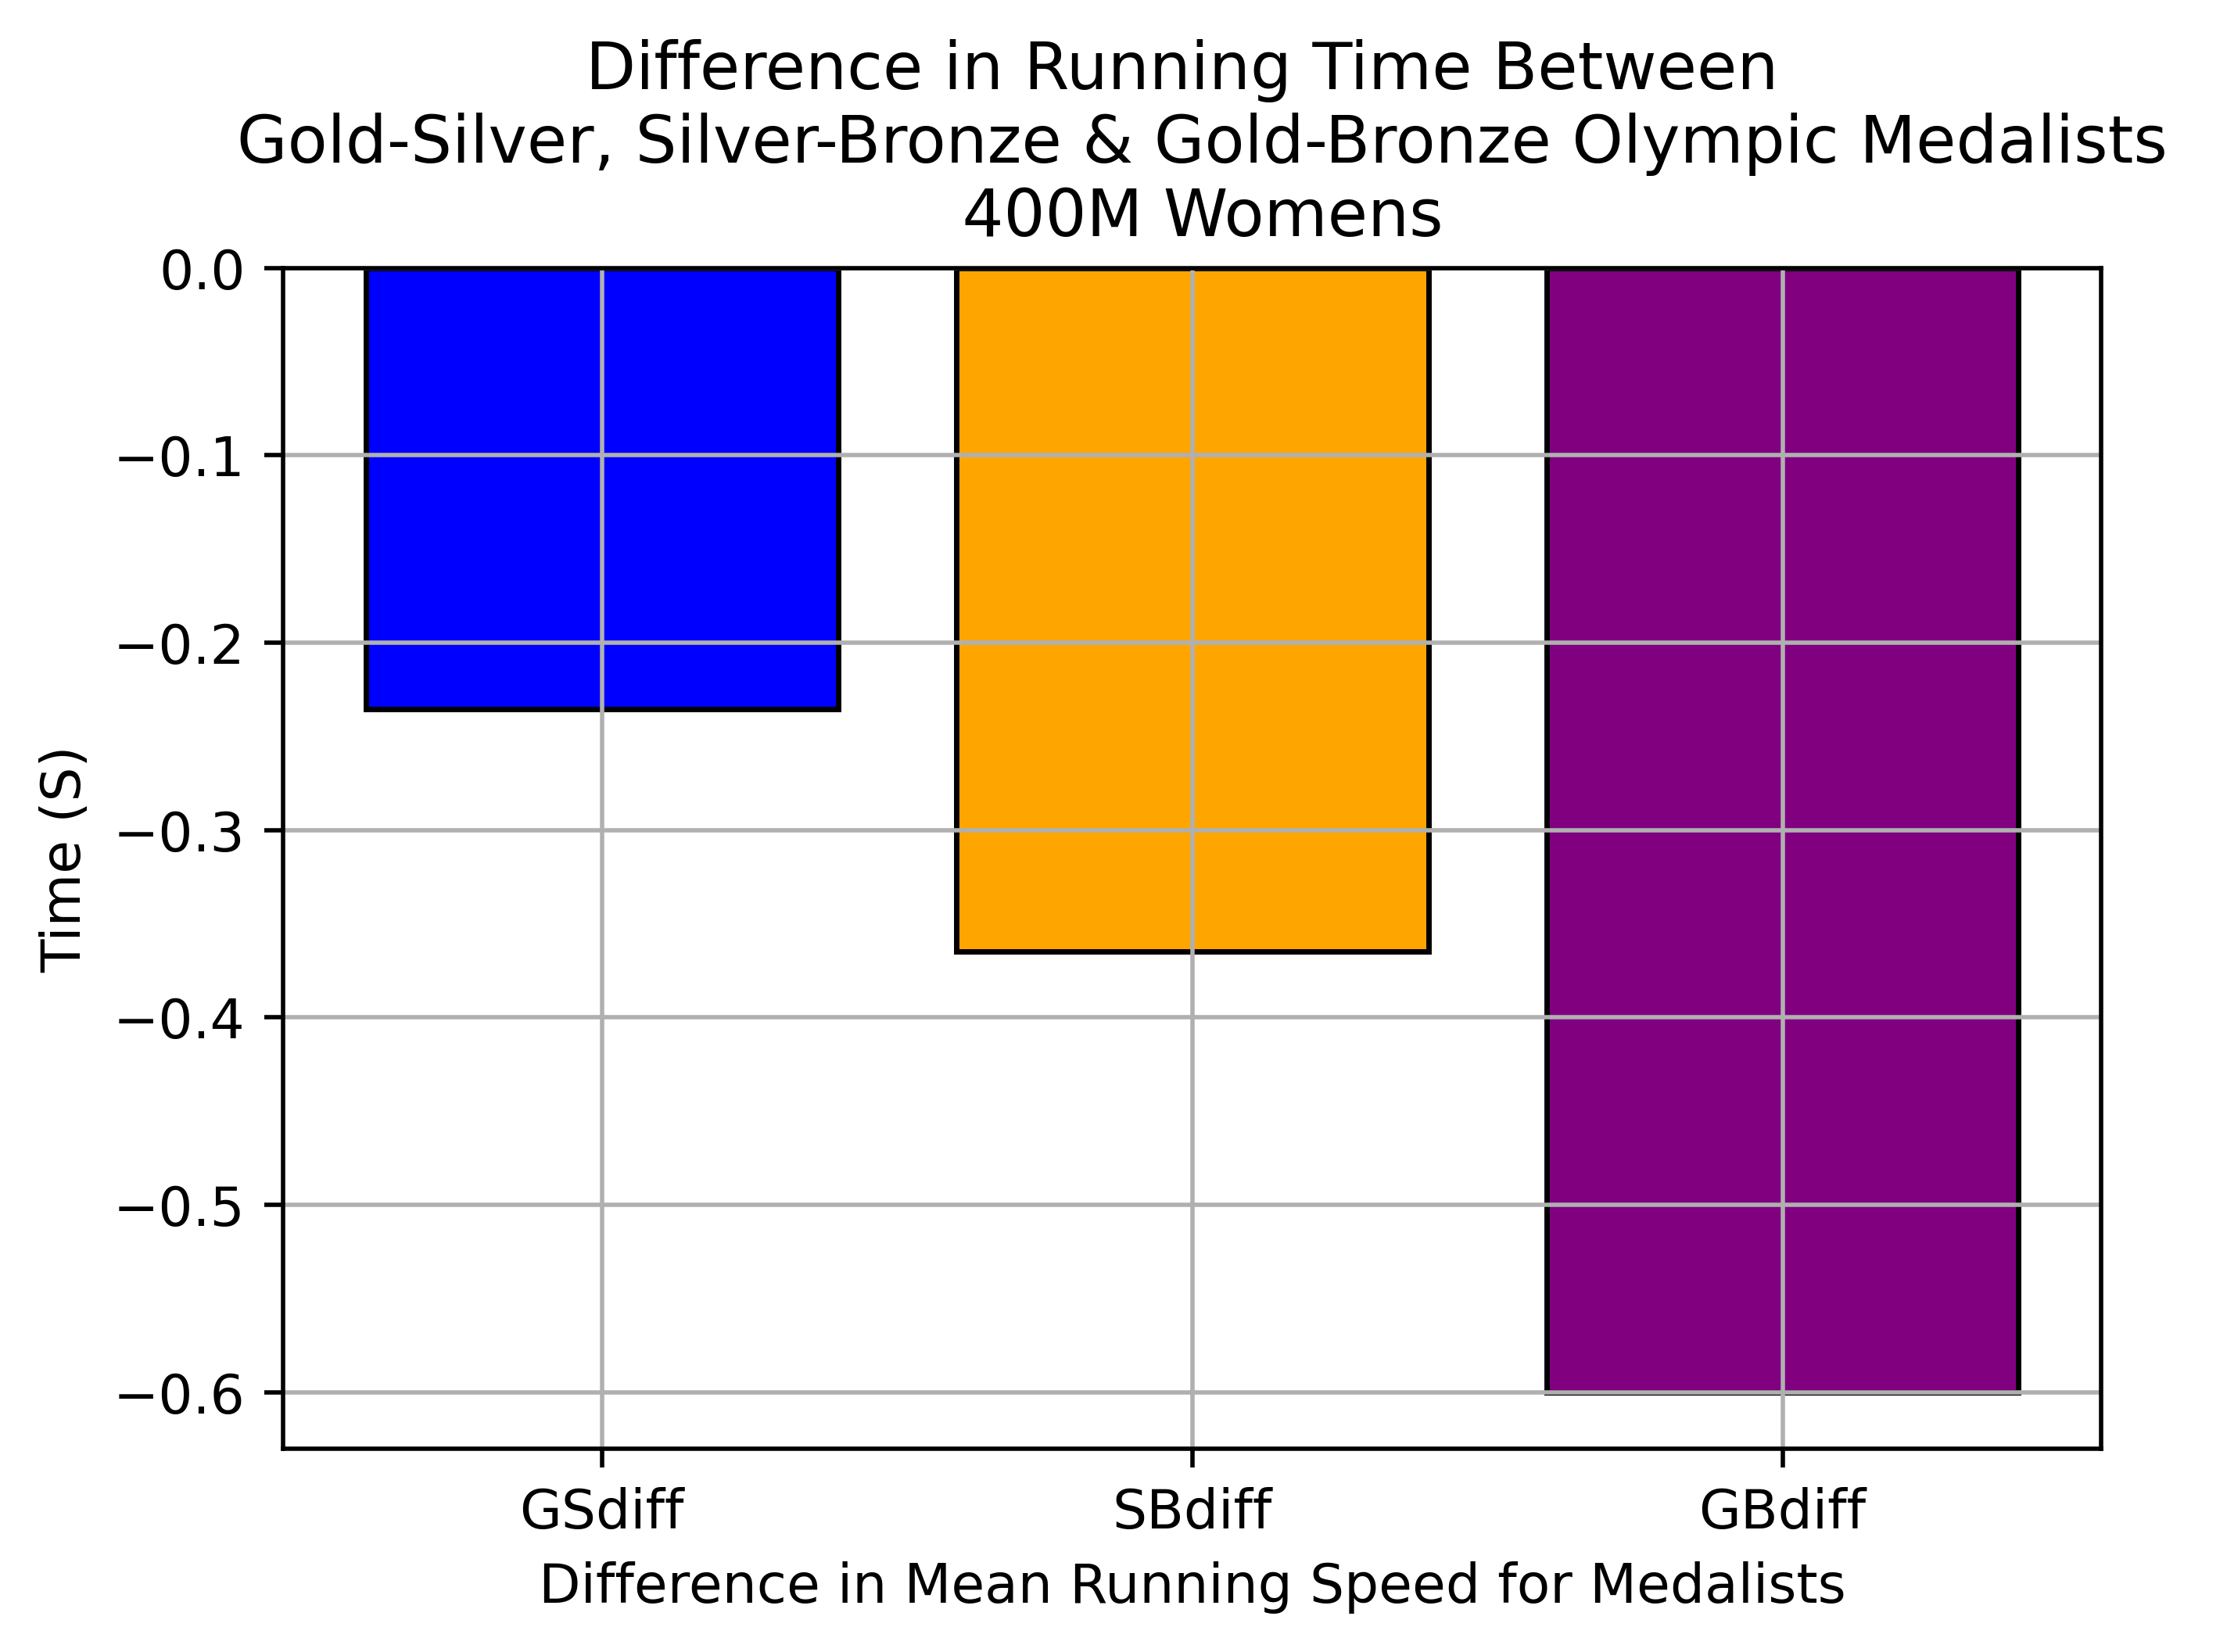

In [106]:
plt.figure(dpi = 500)
dave = plt.bar(labelList4, diffList4, color = ['blue', 'orange', 'purple'], edgecolor= 'black')
plt.title('Difference in Running Time Between \n  Gold-Silver, Silver-Bronze & Gold-Bronze Olympic Medalists \n 400M Womens')
plt.xlabel('Difference in Mean Running Speed for Medalists')
plt.ylabel('Time (S)')
plt.legend
plt.grid()